In [1]:
import pandas as pd

df = pd.read_csv("classification_bank_marketing.csv")
df

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
1,74,student,married,unknown,45628,no,yes,no
2,59,entrepreneur,divorced,primary,34045,yes,no,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
...,...,...,...,...,...,...,...,...
1175,26,blue-collar,married,unknown,21471,no,yes,no
1176,34,student,single,primary,48403,no,no,no
1177,41,management,single,tertiary,2266,yes,yes,no
1178,50,technician,single,unknown,4617,no,yes,yes


In [47]:
df.isnull().sum()

age           0
job          27
marital       0
education    31
balance       0
housing       0
loan          0
y             0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(180)

In [49]:
# isi data job kosong
df['job'] = df['job'].fillna('unknown')
df

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
1,74,student,married,unknown,45628,no,yes,no
2,59,entrepreneur,divorced,primary,34045,yes,no,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
...,...,...,...,...,...,...,...,...
1175,26,blue-collar,married,unknown,21471,no,yes,no
1176,34,student,single,primary,48403,no,no,no
1177,41,management,single,tertiary,2266,yes,yes,no
1178,50,technician,single,unknown,4617,no,yes,yes


In [50]:
df['education'] = df['education'].fillna('unknown')
df

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
1,74,student,married,unknown,45628,no,yes,no
2,59,entrepreneur,divorced,primary,34045,yes,no,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
...,...,...,...,...,...,...,...,...
1175,26,blue-collar,married,unknown,21471,no,yes,no
1176,34,student,single,primary,48403,no,no,no
1177,41,management,single,tertiary,2266,yes,yes,no
1178,50,technician,single,unknown,4617,no,yes,yes


In [51]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
y            0
dtype: int64

In [52]:
df3.duplicated().sum()

np.int64(180)

In [56]:
df = df.drop_duplicates()
df

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
1,74,student,married,unknown,45628,no,yes,no
2,59,entrepreneur,divorced,primary,34045,yes,no,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
...,...,...,...,...,...,...,...,...
995,34,student,single,primary,29442,yes,yes,no
996,54,entrepreneur,married,primary,9754,no,yes,no
997,60,self-employed,married,secondary,30336,yes,no,no
998,20,unknown,married,tertiary,9681,no,yes,no


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.describe()

,age,balance
count,1000.000000,1000.000000
mean,48.273000,25342.763000
std,17.923887,14455.233505
min,18.000000,-998.000000
25%,33.000000,12897.500000
50%,48.000000,26411.000000
75%,63.000000,37545.500000
max,80.000000,49991.000000


In [60]:
df1 = df.copy()
df1.loc[df['balance'] < 0, 'balance'] = df1['balance'].median()
df1

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
1,74,student,married,unknown,45628,no,yes,no
2,59,entrepreneur,divorced,primary,34045,yes,no,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
...,...,...,...,...,...,...,...,...
995,34,student,single,primary,29442,yes,yes,no
996,54,entrepreneur,married,primary,9754,no,yes,no
997,60,self-employed,married,secondary,30336,yes,no,no
998,20,unknown,married,tertiary,9681,no,yes,no


In [61]:
df1.describe()

,age,balance
count,1000.000000,1000.000000
mean,48.273000,25666.980000
std,17.923887,14169.426636
min,18.000000,25.000000
25%,33.000000,13468.000000
50%,48.000000,26413.000000
75%,63.000000,37545.500000
max,80.000000,49991.000000


In [69]:
df5 = df1.copy()

Q1 = df5['balance'].quantile(0.25)
Q3 = df5['balance'].quantile(0.75)
IQR = Q3 = Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df5 = df5[(df5['balance'] >= batas_bawah) & (df5['balance'] <= batas_atas)]
df5

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
6,73,admin.,divorced,primary,30711,yes,no,no
7,68,unknown,single,primary,1076,yes,yes,no
...,...,...,...,...,...,...,...,...
994,56,management,divorced,secondary,32006,yes,no,no
995,34,student,single,primary,29442,yes,yes,no
996,54,entrepreneur,married,primary,9754,no,yes,no
997,60,self-employed,married,secondary,30336,yes,no,no


In [71]:
df6 = df5.copy()

df6['job'] = df6['job'].str.replace('admin.', 'admin', regex=False)
df6

,age,job,marital,education,balance,housing,loan,y
0,51,housemaid,married,tertiary,29616,yes,yes,no
3,67,entrepreneur,single,unknown,29722,yes,yes,no
4,73,self-employed,married,tertiary,18755,yes,yes,no
6,73,admin,divorced,primary,30711,yes,no,no
7,68,unknown,single,primary,1076,yes,yes,no
...,...,...,...,...,...,...,...,...
994,56,management,divorced,secondary,32006,yes,no,no
995,34,student,single,primary,29442,yes,yes,no
996,54,entrepreneur,married,primary,9754,no,yes,no
997,60,self-employed,married,secondary,30336,yes,no,no


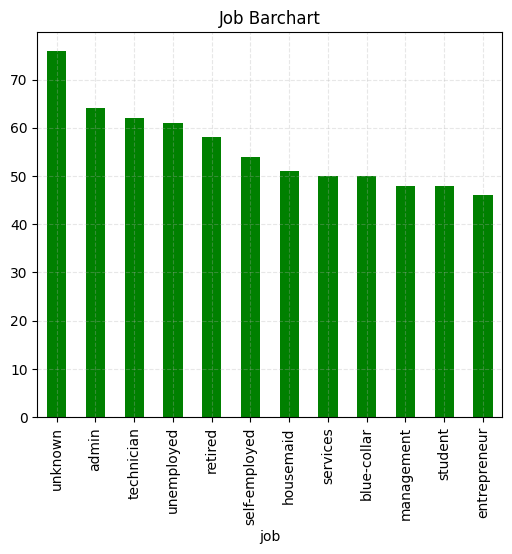

In [80]:
import matplotlib.pyplot as plt
dfc = df6.copy()

plt.figure(figsize=(6,5))
dfc['job'].value_counts().plot(kind='bar', color="green")
plt.title('Job Barchart')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


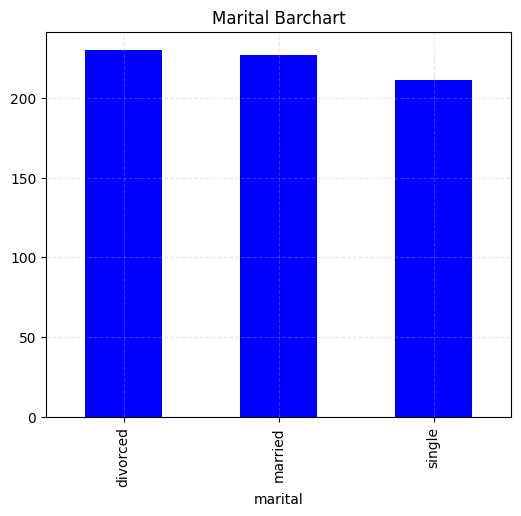

In [79]:
plt.figure(figsize=(6,5))
dfc['marital'].value_counts().plot(kind='bar', color="blue")
plt.title('Marital Barchart')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

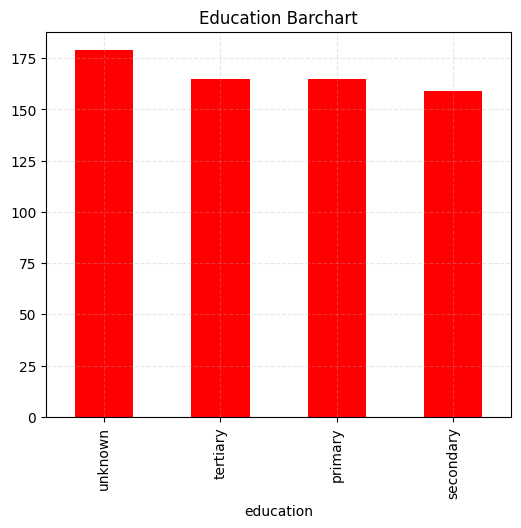

In [78]:
plt.figure(figsize=(6,5))
dfc['education'].value_counts().plot(kind='bar', color="red")
plt.title('Education Barchart')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

X = dfc[['age','job','marital','education','balance','housing','loan']]
y = dfc['y']

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ['age', 'balance']
categorical_columns = ['job', 'marital', 'housing','loan']
ordinal_columns = ['education']

education_order = ['primary','secondary','tertiary','unknown']
ordinal_order = [education_order]

preprocessing = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), numeric_columns),
        ('ohe', OneHotEncoder(), categorical_columns),
        ('oe', OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

logistic_model = Pipeline(
    steps = [
        ('preprocessing', preprocessing),
        ('model', LogisticRegression())
    ]
)

logistic_model.fit(X_train, y_train)
lg_y_pred = logistic_model.predict(X_test)

print("\n Accuracy Score:", accuracy_score(y_test, lg_y_pred))
print("\n Classification Report:\n ", classification_report(y_test, lg_y_pred))
print("\n Confusion Matrix:\n ", confusion_matrix(y_test, lg_y_pred))


 Accuracy Score: 0.917910447761194

 Classification Report:
                precision    recall  f1-score   support

          no       0.91      1.00      0.95       111
         yes       1.00      0.52      0.69        23

    accuracy                           0.92       134
   macro avg       0.95      0.76      0.82       134
weighted avg       0.93      0.92      0.91       134


 Confusion Matrix:
  [[111   0]
 [ 11  12]]


In [177]:
score = cross_val_score(logistic_model, X_train, y_train, cv=5)
print("Score", score)
print("\n Rata rata CV:\n", np.mean(score))


Score [0.89719626 0.89719626 0.90654206 0.91588785 0.90566038]

 Rata rata CV:
 0.9044965614530065


# Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

X = dfc[['age','job','marital','education','balance','housing','loan']]
y = dfc['y']

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ['age', 'balance']
categorical_columns = ['job', 'marital', 'housing','loan']
ordinal_columns = ['education']

education_order = ['primary','secondary','tertiary','unknown']
ordinal_order = [education_order]

preprocessing = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), numeric_columns),
        ('ohe', OneHotEncoder(), categorical_columns),
        ('oe', OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

dtree_model = Pipeline(
    steps = [
        ('preprocessing', preprocessing),
        ('model', DecisionTreeClassifier())
    ]
)

dtree_model.fit(X_train, y_train)
dt_y_pred = dtree_model.predict(X_test)

print("\n Accuracy Score:", accuracy_score(y_test, dt_y_pred))
print("\n Classification Report:\n ", classification_report(y_test, dt_y_pred))
print("\n Confusion Matrix:\n ", confusion_matrix(y_test, dt_y_pred))


 Accuracy Score: 0.7910447761194029

 Classification Report:
                precision    recall  f1-score   support

          no       0.90      0.84      0.87       111
         yes       0.42      0.57      0.48        23

    accuracy                           0.79       134
   macro avg       0.66      0.70      0.68       134
weighted avg       0.82      0.79      0.80       134


 Confusion Matrix:
  [[93 18]
 [10 13]]


In [190]:
score = cross_val_score(dtree_model, X_train, y_train, cv=5)
print("Score", score)
print("\n Rata rata CV:\n", np.mean(score))

Score [0.89719626 0.76635514 0.79439252 0.8317757  0.81132075]

 Rata rata CV:
 0.8202080761770411


# Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

X = dfc[['age','job','marital','education','balance','housing','loan']]
y = dfc['y']

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ['age', 'balance']
categorical_columns = ['job', 'marital', 'housing','loan']
ordinal_columns = ['education']

education_order = ['primary','secondary','tertiary','unknown']
ordinal_order = [education_order]

preprocessing = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), numeric_columns),
        ('ohe', OneHotEncoder(), categorical_columns),
        ('oe', OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

rf_model = Pipeline(
    steps = [
        ('preprocessing', preprocessing),
        ('model', RandomForestClassifier(random_state=42))
    ]
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n ", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))


 Accuracy Score: 0.917910447761194

 Classification Report:
                precision    recall  f1-score   support

          no       0.91      1.00      0.95       111
         yes       1.00      0.52      0.69        23

    accuracy                           0.92       134
   macro avg       0.95      0.76      0.82       134
weighted avg       0.93      0.92      0.91       134


 Confusion Matrix:
  [[111   0]
 [ 11  12]]


In [191]:
score = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Score", score)
print("\n Rata rata CV:\n", np.mean(score))

Score [0.91588785 0.89719626 0.90654206 0.91588785 0.90566038]

 Rata rata CV:
 0.9082348792100159


# KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

X = dfc[['age','job','marital','education','balance','housing','loan']]
y = dfc['y']

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ['age', 'balance']
categorical_columns = ['job', 'marital', 'housing','loan']
ordinal_columns = ['education']

education_order = ['primary','secondary','tertiary','unknown']
ordinal_order = [education_order]

preprocessing = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), numeric_columns),
        ('ohe', OneHotEncoder(), categorical_columns),
        ('oe', OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

kNN_model = Pipeline(
    steps = [
        ('preprocessing', preprocessing),
        ('model', KNeighborsClassifier())
    ]
)

kNN_model.fit(X_train, y_train)
kNN_y_pred = kNN_model.predict(X_test)

print("\n Accuracy Score:", accuracy_score(y_test, kNN_y_pred))
print("\n Classification Report:\n ", classification_report(y_test, kNN_y_pred))
print("\n Confusion Matrix:\n ", confusion_matrix(y_test, kNN_y_pred))


 Accuracy Score: 0.8656716417910447

 Classification Report:
                precision    recall  f1-score   support

          no       0.87      0.98      0.92       111
         yes       0.78      0.30      0.44        23

    accuracy                           0.87       134
   macro avg       0.82      0.64      0.68       134
weighted avg       0.86      0.87      0.84       134


 Confusion Matrix:
  [[109   2]
 [ 16   7]]


In [193]:
score = cross_val_score(kNN_model, X_train, y_train, cv=5)
print("Score", score)
print("\n Rata rata CV:\n", np.mean(score))

Score [0.81308411 0.8317757  0.85046729 0.85981308 0.83962264]

 Rata rata CV:
 0.8389525656850644


# grid search cv

In [194]:
param_grid = {
    "model__n_estimators": [100,200,300],
    "model__max_depth": [5,10,15, None],
    "model__min_samples_split": [2,5,10],
    "model__min_samples_leaf": [1,2,4]
}

grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid, n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)
print("\n Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

print("\n Accuracy Score:", accuracy_score(y_test, best_rf_pred))
print("\n Classification Report:\n ", classification_report(y_test, best_rf_pred))
print("\n Confusion Matrix:\n ", confusion_matrix(y_test, best_rf_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}

 Accuracy Score: 0.9104477611940298

 Classification Report:
                precision    recall  f1-score   support

          no       0.90      1.00      0.95       111
         yes       1.00      0.48      0.65        23

    accuracy                           0.91       134
   macro avg       0.95      0.74      0.80       134
weighted avg       0.92      0.91      0.90       134


 Confusion Matrix:
  [[111   0]
 [ 12  11]]


In [197]:
dfc.describe()

,age,balance
count,668.000000,668.000000
mean,48.368263,17681.935629
std,17.780327,9861.835184
min,18.000000,25.000000
25%,33.000000,9194.250000
50%,48.000000,18674.500000
75%,63.000000,26428.250000
max,80.000000,33651.000000


In [271]:
dfc.tail()

,age,job,marital,education,balance,housing,loan,y
994,56,management,divorced,secondary,32006,yes,no,no
995,34,student,single,primary,29442,yes,yes,no
996,54,entrepreneur,married,primary,9754,no,yes,no
997,60,self-employed,married,secondary,30336,yes,no,no
998,20,unknown,married,tertiary,9681,no,yes,no


In [288]:
data = pd.DataFrame([[60, "self-employed", "married", "secondary", 30336, "yes", "no"]], columns=["age","job","marital","education","balance","housing","loan"])

prediksi = best_rf_model.predict(data)[0]
presentase = max(best_rf_model.predict_proba(data)[0])

print(f"Best Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Best Model memprediksi no dengan tingkat keyakinan 84.43%


In [228]:
import joblib

joblib.dump(best_rf_model,"best_rf_model.joblib")

['best_rf_model.joblib']